# Fingerprint analysis

## Imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import itertools
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from kinsim_structure.encoding import Fingerprint
from kinsim_structure.similarity import calculate_similarity

## IO paths

In [4]:
PATH_TO_DATA = Path('/') / 'home' / 'dominique' / 'Documents' / 'data' / 'kinsim' / '20190724_full'
PATH_TO_KINSIM = Path('/') / 'home' / 'dominique' / 'Documents' / 'projects' / 'kinsim_structure'

path_to_fingerprints = PATH_TO_KINSIM / 'results' / 'fingerprints' / 'europin_results'

## Functions

In [5]:
def get_fingerprint_type1(fingerprint_type):
    
    return pd.concat(
        [getattr(i, fingerprint_type) for i in fingerprints], 
        axis=0
    )

In [6]:
def get_fingerprint_type2(fingerprint_type):
    
    physchem = pd.concat(
        [getattr(i, fingerprint_type)['physchem'] for i in fingerprints], 
        axis=0
    )
    moments = pd.concat(
        [getattr(i, fingerprint_type)['moments'] for i in fingerprints], 
        axis=0
    )
    
    return {
        'physchem': physchem,
        'moments': moments
    }

## Load fingerprints

In [7]:
with open(path_to_fingerprints / 'fingerprints.p', 'rb') as f:
    fingerprints = pickle.load(f)
    
print(f'Number of fingerprints: {len(fingerprints)}')
fingerprints = [i for i in fingerprints if i is not None]
print(f'Number of non-empty fingerprints: {len(fingerprints)}')

Number of fingerprints: 3878
Number of non-empty fingerprints: 3875


## Fingerprint type 1

In [8]:
fp1 = get_fingerprint_type1('fingerprint_type1')

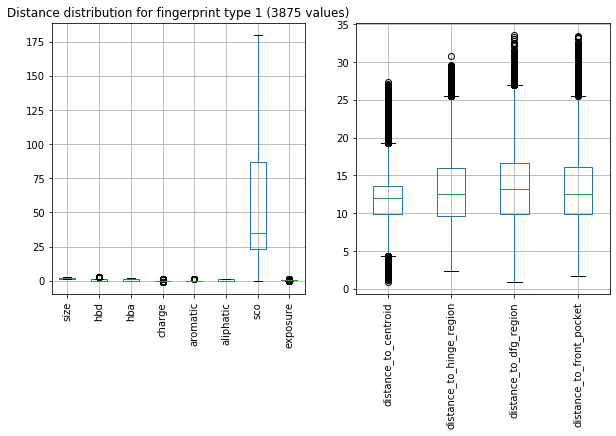

In [9]:
fig, axes = plt.subplots(figsize=(10,5),nrows=1, ncols=2)

box_plot = fp1.iloc[:, :8].plot(
    kind='box',
    title=f'Distance distribution for fingerprint type 1 ({int(len(fp1) / 85)} values)',
    ax=axes[0],
    grid=True,
    rot=90
)

box_plot = fp1.iloc[:, 8:].plot(
    kind='box',
    ax=axes[1],
    grid=True,
    rot=90
)

In [10]:
fp1_norm = get_fingerprint_type1('fingerprint_type1_normalized')

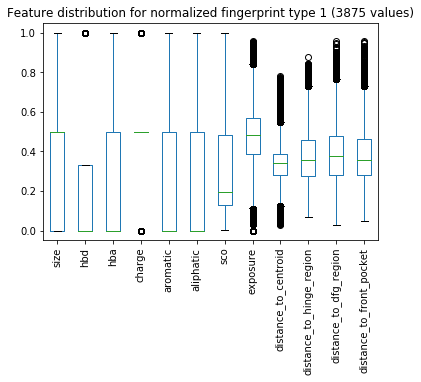

In [11]:
boxplot = fp1_norm.plot(
    kind='box',
    title=f'Feature distribution for normalized fingerprint type 1 ({int(len(fp1_norm) / 85)} values)',
    rot=90
)

## Fingerprint type 2

In [12]:
fp2 = get_fingerprint_type2('fingerprint_type2')

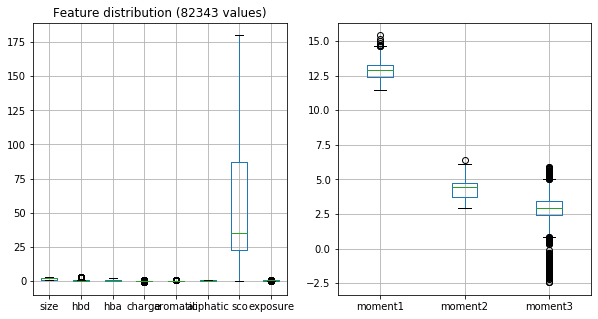

In [13]:
fig, axes = plt.subplots(figsize=(10,5),nrows=1, ncols=2)

box_plot = fp2['physchem'].plot(
    kind='box',
    title=f'Feature distribution ({int(len(fp2["physchem"]) / 4)} values)',
    ax=axes[0],
    grid=True
)

box_plot = fp2['moments'].plot(
    kind='box',
    ax=axes[1],
    grid=True
)

In [14]:
fp2_norm = get_fingerprint_type2('fingerprint_type2_normalized')

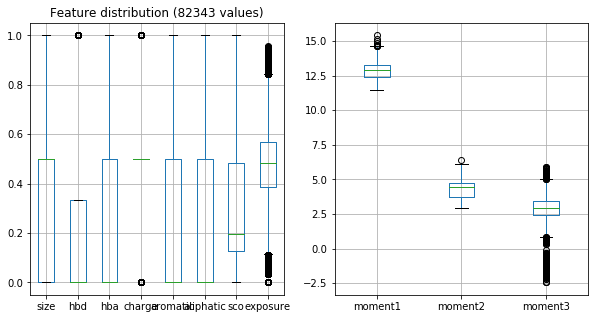

In [15]:
fig, axes = plt.subplots(figsize=(10,5),nrows=1, ncols=2)

box_plot = fp2_norm['physchem'].plot(
    kind='box',
    title=f'Feature distribution ({int(len(fp2_norm["physchem"]) / 4)} values)',
    ax=axes[0],
    grid=True
)

box_plot = fp2_norm['moments'].plot(
    kind='box',
    ax=axes[1],
    grid=True
)

In [16]:
import seaborn as sns

Rename columns and indices for nicer plot labels.

In [17]:
# Physchem

fp2_norm['physchem'].rename(
    columns={
        'size': 'Size',
        'hbd': 'HBD',
        'hba': 'HBA',
        'charge': 'Charge',
        'aromatic': 'Aromatic',
        'aliphatic': 'Aliphatic',
        'sca': 'SCA',
        'exposure': 'Exposure'
    },
    inplace=True
)

In [18]:
# Spatial

fp2_norm['moments'].reset_index(inplace=True)

fp2_norm['moments'].rename(
    columns={
        'index': 'Distance to',
        'moment1': 'Moment 1',
        'moment2': 'Moment 2',
        'moment3': 'Moment 3'
    },
    inplace=True
)

a = {
    'distance_to_centroid': 'Centroid',
    'distance_to_hinge_region': 'Hinge region',
    'distance_to_dfg_region': 'DFG region',
    'distance_to_front_pocket': 'Front pocket'
}

fp2_norm['moments']['Distance to'] = [a[i] for i in fp2_norm['moments']['Distance to']]

Melt data.

In [19]:
df1 = fp2_norm['physchem'].melt(
    var_name='Physicochemical features', 
    value_name='Feature value'
)

In [20]:
df2 = fp2_norm['moments'].reset_index().melt(
    id_vars=['Distance to', 'index'],
    var_name='Spatial features', 
    value_name='Feature value'
)

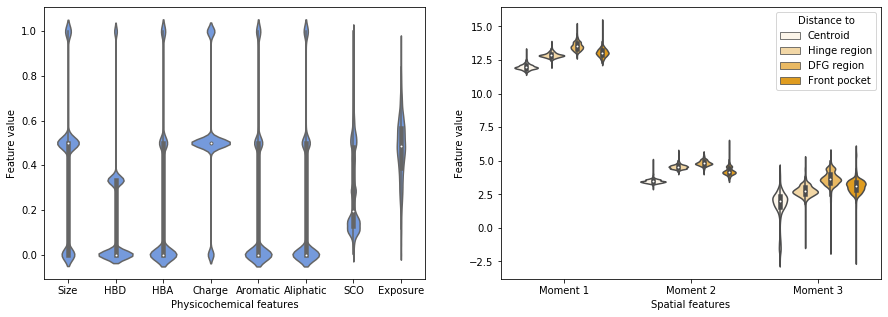

In [21]:
fig, axes = plt.subplots(figsize=(15,5), nrows=1, ncols=2)

ax = sns.violinplot(
    x='Physicochemical features', 
    y='Feature value', 
    data=df1,
    color='cornflowerblue',
    rot=90,
    ax=axes[0]
)

ax = sns.violinplot(
    x='Spatial features', 
    y='Feature value', 
    hue='Distance to',
    data=df2,
    color='orange',
    rot=90,
    ax=axes[1]
)

In [22]:
fig.savefig(
    path_to_fingerprints / 'feature_distribution_normballester.png', 
    dpi=300
)

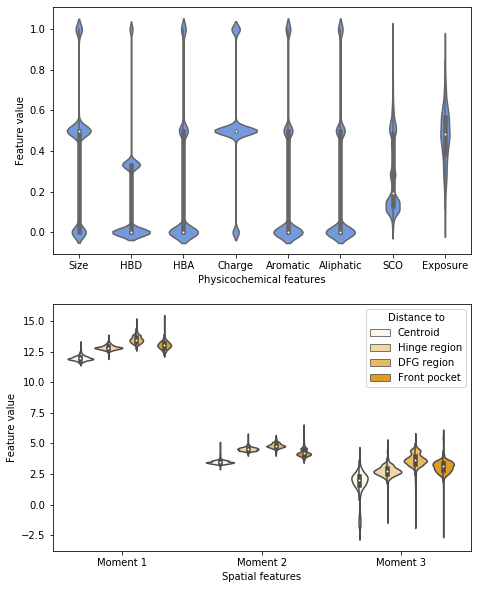

In [23]:
fig, axes = plt.subplots(figsize=(7.5,10), nrows=2, ncols=1)

ax = sns.violinplot(
    x='Physicochemical features', 
    y='Feature value', 
    data=df1,
    color='cornflowerblue',
    rot=90,
    ax=axes[0]
)

ax = sns.violinplot(
    x='Spatial features', 
    y='Feature value', 
    hue='Distance to',
    data=df2,
    color='orange',
    rot=90,
    ax=axes[1]
)

In [24]:
fig.savefig(
    path_to_fingerprints / 'feature_distribution_normballester2.png', 
    dpi=300
)